In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load all the data
reviews = pd.read_csv('reviews.csv')
breweries = pd.read_csv('breweries.csv')
beers = pd.read_csv('beers.csv')
aromas = pd.read_csv('beer_data_set.csv')

In [3]:
# Merge reviews and beers
reviews_beers = pd.merge(reviews, beers, left_on='beer_id', how='inner', right_on='id')

In [4]:
reviews_beers.head()

,beer_id,username,date,text,look,smell,taste,feel,overall,score,id,name,brewery_id,state,country,style,availability,abv,notes,retired
0,271781,bluejacket74,2017-03-17,"750 ml bottle, 2016 vintage, bottle #304 of...",4.0,4.00,4.0,4.25,4.00,4.03,271781,Motorbreath Imperial Stout,28094,OH,US,American Imperial Stout,Limited (brewed once),10.8,2016 - Five Year Anniversary Imperial Stout,t
1,271781,atlbravsrno1,2018-08-04,,4.0,4.00,4.0,4.00,4.00,4.00,271781,Motorbreath Imperial Stout,28094,OH,US,American Imperial Stout,Limited (brewed once),10.8,2016 - Five Year Anniversary Imperial Stout,t
2,271781,Zombiefeynman,2018-04-14,,4.0,3.25,2.5,3.25,2.75,2.90,271781,Motorbreath Imperial Stout,28094,OH,US,American Imperial Stout,Limited (brewed once),10.8,2016 - Five Year Anniversary Imperial Stout,t
3,271781,aaronyoung01,2017-08-16,,5.0,3.00,2.5,3.00,2.50,2.82,271781,Motorbreath Imperial Stout,28094,OH,US,American Imperial Stout,Limited (brewed once),10.8,2016 - Five Year Anniversary Imperial Stout,t
4,271781,BamfBacon,2017-07-12,,4.0,4.00,4.0,4.00,4.00,4.00,271781,Motorbreath Imperial Stout,28094,OH,US,American Imperial Stout,Limited (brewed once),10.8,2016 - Five Year Anniversary Imperial Stout,t


In [5]:
# merge similar beer styles together in a meta_style column

metastyle_beer_dict = dict([
    ('IPA', 
    ['IPA', 'DDHIPA', 'NEIPA']),

    ('Ale', 
    ['Ale']),

    ('Sour', 
    ['Lambic', 'Sour', 'Kvass', 'Gueuze', 'Flanders', 'Gose', 'Sahti', 'Brett', 'Saison', 'Fruit']),

    ('Lager', 
    ['Lager', 'Pilsner', 'Bock', 'Chile', 'Happoshu', 'Pilsener', 'Helles', 'Oktoberfest', 'kölsch']),

    ('Stout', 
    ['Stout', 'Porter']),

    ('Smoked Beer', 
    ['Smoked','Smoke', 'Rauchbier']),

    ('Winter Beer', 
    ['Winter', 'Christmas', 'Pumpkin', 'spice']),

    ('Alcohol-free', 
    ['Low Alcohol Beer']),

    ('Belgian Blonde', 
    ['Dubbel', 'Quadrupel', 'Tripel', 'Belgian']),

    ('Wheat Beer', 
    ['Wheat', 'Weissbier', 'Witbier', 'Hefeweizen', 'Berliner']),

    ('Ambree', 
    ['Altbier', 'Rye']),

    ('Boozy', 
    ['Barleywine', 'Scotch', 'Scottish', 'Champagne', 'Braggot', 'Liquor'])

])

# Create a function to find the metastyle

# make metastyle_beer_dict_lower as a copy of metastyle_beer_dict with lower case values
metastyle_beer_dict_lower = {}
for key, value in metastyle_beer_dict.items():
    metastyle_beer_dict_lower[key] = [x.lower() for x in value]

def find_metastyle(specific_style):
    for metastyle, beer_substyles in metastyle_beer_dict_lower.items():
        for beer_substyle_keyword in beer_substyles:
            if beer_substyle_keyword in specific_style:
                return metastyle
    
    return 'Other'

In [6]:
# Iterate through the styles to find the metastyle
# make reviews_beers['style'] as string and lowercased
reviews_beers['style'] = reviews_beers['style'].astype(str).str.lower()

reviews_beers['meta_style'] = reviews_beers['style'].apply(find_metastyle)
reviews_beers.sample(5)

,beer_id,username,date,text,look,smell,taste,feel,overall,score,...,name,brewery_id,state,country,style,availability,abv,notes,retired,meta_style
783267,17,LarryMyers,2014-05-23,,NaN,NaN,NaN,NaN,NaN,3.50,...,Widmer Hefeweizen,8,OR,US,german hefeweizen,Year-round,4.9,availability: year-round,f,Wheat Beer
4485442,7520,lbriones5,2012-05-09,,NaN,NaN,NaN,NaN,NaN,4.50,...,Dark Lord Imperial Stout,26,IN,US,russian imperial stout,Spring,15.0,A demonic Russian-Style Imperial Stout brewed ...,f,Stout
6165738,109314,bbtkd,2016-06-04,"Fargo Brewing Sodbuster Porter, 6.1% ABV, I...",3.5,4.25,4.25,3.75,4.00,4.11,...,Sodbuster,27076,ND,US,american porter,Year-round,6.1,No notes at this time.,f,Stout
4576306,2751,Jadjunk,2013-09-15,"""Racer 5 is an aggressive styled India Pale...",4.5,4.50,4.50,4.00,4.25,4.40,...,Racer 5 India Pale Ale,610,CA,US,american ipa,Year-round,7.5,This hoppy American IPA is a full bodied beer ...,f,IPA
1979090,54089,Ego,2011-10-15,on tap @ jasper's prince frederick md... wa...,4.5,4.00,4.50,4.50,4.00,4.28,...,Sierra Nevada / Dogfish Head - Life & Limb,140,CA,US,english old ale,Rotating,10.2,(2009 Vintage) Vintage Ale brewed with Molasse...,t,Ale


In [7]:
# Print the number of beers in each metastyle
print(reviews_beers['meta_style'].value_counts())
# Print the styles in other metastyle and sort
print(reviews_beers[reviews_beers['meta_style'] == 'Other']['style'].value_counts().sort_values(ascending=False))
reviews_beers.head()

Ale               2369825
IPA               2115085
Stout             1643013
Lager              902957
Sour               700603
Belgian Blonde     415117
Winter Beer        218710
Other              214114
Boozy              197172
Wheat Beer         178940
Ambree              80444
Smoked Beer         32486
Alcohol-free         4448
Name: meta_style, dtype: int64
english extra special / strong bitter (esb)    52060
german schwarzbier                             33494
french bière de garde                          27746
english bitter                                 26439
german dunkelweizen                            22228
california common / steam beer                 14631
european export / dortmunder                   14067
german kellerbier / zwickelbier                13521
german kristalweizen                            7919
german roggenbier                               2007
nan                                                2
Name: style, dtype: int64


,beer_id,username,date,text,look,smell,taste,feel,overall,score,...,name,brewery_id,state,country,style,availability,abv,notes,retired,meta_style
0,271781,bluejacket74,2017-03-17,"750 ml bottle, 2016 vintage, bottle #304 of...",4.0,4.00,4.0,4.25,4.00,4.03,...,Motorbreath Imperial Stout,28094,OH,US,american imperial stout,Limited (brewed once),10.8,2016 - Five Year Anniversary Imperial Stout,t,Stout
1,271781,atlbravsrno1,2018-08-04,,4.0,4.00,4.0,4.00,4.00,4.00,...,Motorbreath Imperial Stout,28094,OH,US,american imperial stout,Limited (brewed once),10.8,2016 - Five Year Anniversary Imperial Stout,t,Stout
2,271781,Zombiefeynman,2018-04-14,,4.0,3.25,2.5,3.25,2.75,2.90,...,Motorbreath Imperial Stout,28094,OH,US,american imperial stout,Limited (brewed once),10.8,2016 - Five Year Anniversary Imperial Stout,t,Stout
3,271781,aaronyoung01,2017-08-16,,5.0,3.00,2.5,3.00,2.50,2.82,...,Motorbreath Imperial Stout,28094,OH,US,american imperial stout,Limited (brewed once),10.8,2016 - Five Year Anniversary Imperial Stout,t,Stout
4,271781,BamfBacon,2017-07-12,,4.0,4.00,4.0,4.00,4.00,4.00,...,Motorbreath Imperial Stout,28094,OH,US,american imperial stout,Limited (brewed once),10.8,2016 - Five Year Anniversary Imperial Stout,t,Stout


In [8]:
# group by beer id and keep the metastyle
from scipy.stats import mode

def get_majority(series):
    try:
        return mode(series)[0][0]
    except:
        return 'N/A'  # Default value when mode is not available
    
reviews_beers['review_scores'] = reviews_beers['score']

reviews_beers_grouped = reviews_beers.groupby('beer_id').agg({'review_scores': 'mean', 'meta_style': 'first', 'country': get_majority, 'state': get_majority})
reviews_beers_grouped.head(5)

C:\Users\nicte\AppData\Local\Temp/ipykernel_25984/513927196.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return mode(series)[0][0]
c:\Users\nicte\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
C:\Users\nicte\AppData\Local\Temp/ipykernel_25984/513927196.py:6: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead

,review_scores,meta_style,country,state
beer_id,,,,
3,4.106667,IPA,US,TX
4,3.639000,Stout,US,TX
5,3.456920,Lager,US,LA
6,3.660384,Ale,US,LA
7,3.286942,Sour,US,LA


In [9]:
reviews_beers_grouped.head(20)

,review_scores,meta_style,country,state
beer_id,,,,
3,4.106667,IPA,US,TX
4,3.639000,Stout,US,TX
5,3.456920,Lager,US,LA
6,3.660384,Ale,US,LA
7,3.286942,Sour,US,LA
8,3.311286,Lager,US,LA
9,3.186970,Lager,US,LA
10,3.805017,Belgian Blonde,US,ME
11,3.305926,Ale,US,WA


In [10]:
reviews_beers_grouped_copy = reviews_beers_grouped.copy().reset_index()
reviews_beers_grouped_copy.drop(['beer_id'], axis=1, inplace=True)
reviews_beers_grouped_copy

,review_scores,meta_style,country,state
0,4.106667,IPA,US,TX
1,3.639000,Stout,US,TX
2,3.456920,Lager,US,LA
3,3.660384,Ale,US,LA
4,3.286942,Sour,US,LA
...,...,...,...,...
309520,4.480000,Lager,CO,NaN
309521,2.250000,Lager,CO,NaN
309522,4.020000,IPA,US,CA
309523,3.530000,Wheat Beer,US,FL


In [11]:
reviews_beers_grouped_copy['mean_rating'] = reviews_beers_grouped_copy['review_scores']
reviews_beers_grouped_copy['count_rating'] = reviews_beers_grouped_copy['review_scores']
# Extract us beers
us_beers = reviews_beers_grouped_copy[reviews_beers_grouped_copy['country'] == 'US']
# Groupby state and metastyle
us_beers_grouped = us_beers.groupby(['state', 'meta_style']).agg({'mean_rating': 'mean', 'count_rating': 'count'})
us_beers_grouped.reset_index(inplace=True)
# Create a "relative count" column where the count is divided by the sum of the counts for that state
us_beers_grouped['relative_count'] = us_beers_grouped.groupby('state')['count_rating'].apply(lambda x: x / x.sum())
us_beers_grouped.head(5)

,state,meta_style,mean_rating,count_rating,relative_count
0,AK,Ale,3.798380,301,0.265901
1,AK,Ambree,3.761652,12,0.010601
2,AK,Belgian Blonde,3.913846,57,0.050353
3,AK,Boozy,4.122280,50,0.044170
4,AK,IPA,3.889888,213,0.188163


In [12]:
# print the range of relative_count
print(us_beers_grouped['relative_count'].min())
print(us_beers_grouped['relative_count'].max())

0.00011243534967393749
0.3938223938223938


In [13]:
# Remove countries that have less than 10 beers, only keep european continent countries
european_country_codes = ['BE', 'BG', 'CZ', 'DK', 'DE', 'EE', 'IE', 'EL', 'ES', 'FR', 'HR', 'IT', 'CY', 'LV', 'LT', 'LU', 'HU', 'MT', 'NL', 'AT', 'PL', 'PT', 'RO', 'SI', 'SK', 'FI', 'SE', 'UK', 'IS', 'LI', 'NO', 'CH']
reviews_beers_grouped_reduced = reviews_beers_grouped_copy.groupby('country').filter(lambda x: len(x) > 10)
reviews_beers_grouped_reduced = reviews_beers_grouped_reduced[reviews_beers_grouped_reduced['country'].isin(european_country_codes)]

country_beers = reviews_beers_grouped_reduced.groupby(['country', 'meta_style']).agg({'mean_rating': 'mean', 'count_rating': 'count'})
country_beers.reset_index(inplace=True)

country_beers['relative_count'] = country_beers.groupby('country')['count_rating'].apply(lambda x: x / x.sum())
country_beers.head(5)

,country,meta_style,mean_rating,count_rating,relative_count
0,AT,Alcohol-free,2.776905,8,0.010390
1,AT,Ale,3.366734,132,0.171429
2,AT,Ambree,3.880151,10,0.012987
3,AT,Belgian Blonde,3.593688,9,0.011688
4,AT,Boozy,3.929803,11,0.014286


In [15]:
eu_dict_code_to_name = {
    'BE': 'Belgium',
    'BG': 'Bulgaria',
    'CZ': 'Czech Republic',
    'DK': 'Denmark',
    'DE': 'Germany',
    'EE': 'Estonia',
    'IE': 'Ireland',
    'EL': 'Greece',
    'ES': 'Spain',
    'FR': 'France',
    'HR': 'Croatia',
    'IT': 'Italy',
    'CY': 'Cyprus',
    'LV': 'Latvia',
    'LT': 'Lithuania',
    'LU': 'Luxembourg',
    'HU': 'Hungary',
    'MT': 'Malta',
    'NL': 'Netherlands',
    'AT': 'Austria',
    'PL': 'Poland',
    'PT': 'Portugal',
    'RO': 'Romania',
    'SI': 'Slovenia',
    'SK': 'Slovakia',
    'FI': 'Finland',
    'SE': 'Sweden',
    'UK': 'United Kingdom',
    'IS': 'Iceland',
    'LI': 'Liechtenstein',
    'NO': 'Norway',
    'CH': 'Switzerland'
}

state_dict_code_to_name = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
    'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming',
    'DC': 'District of Columbia'
}
print("check if same length eu: ", len(eu_dict_code_to_name) == len(european_country_codes))
print("check if same length us: ", len(state_dict_code_to_name) == len(us_beers_grouped['state'].unique()))

check if same length eu:  True
check if same length us:  True


In [ ]:
# rename country and state to country_code and state_code
country_beers.rename(columns={'country': 'country_code'}, inplace=True)
us_beers_grouped.rename(columns={'state': 'state_code'}, inplace=True)

In [18]:

# Apply the dictionary to the country column
country_beers['country'] = country_beers['country_code'].apply(lambda x: eu_dict_code_to_name[x])
us_beers_grouped['state'] = us_beers_grouped['state_code'].apply(lambda x: state_dict_code_to_name[x])

# Change order of columns
country_beers = country_beers[['country', 'country_code', 'meta_style', 'mean_rating', 'count_rating', 'relative_count']]
us_beers_grouped = us_beers_grouped[['state', 'state_code', 'meta_style', 'mean_rating', 'count_rating', 'relative_count']]

country_beers.head(5)

,country,country_code,meta_style,mean_rating,count_rating,relative_count
0,Austria,AT,Alcohol-free,2.776905,8,0.010390
1,Austria,AT,Ale,3.366734,132,0.171429
2,Austria,AT,Ambree,3.880151,10,0.012987
3,Austria,AT,Belgian Blonde,3.593688,9,0.011688
4,Austria,AT,Boozy,3.929803,11,0.014286


In [19]:
us_beers_grouped.head(5)

,state,state_code,meta_style,mean_rating,count_rating,relative_count
0,Alaska,AK,Ale,3.798380,301,0.265901
1,Alaska,AK,Ambree,3.761652,12,0.010601
2,Alaska,AK,Belgian Blonde,3.913846,57,0.050353
3,Alaska,AK,Boozy,4.122280,50,0.044170
4,Alaska,AK,IPA,3.889888,213,0.188163


In [20]:
# save the data in a csv file, us_beers_grouped and country_beers
country_beers.to_csv('country_beers.csv', index=False)
us_beers_grouped.to_csv('us_beers.csv', index=False)

In [51]:
print(country_beers['relative_count'].min())
print(country_beers['relative_count'].max())
# print the max row
country_beers[country_beers['relative_count'] == country_beers['relative_count'].max()]

0.0010251153254741158
0.6235294117647059


,country,meta_style,mean_rating,count_rating,relative_count
63,CZ,Lager,3.442837,530,0.623529


In [18]:
# create a new column with the average of the review_overall
reviews_beers['review_scores'] = reviews_beers['score']

grouped_reviews = reviews_beers.groupby(['country', 'meta_style']).agg({'review_scores': ['mean', 'count']})
grouped_reviews

review_scores      
                             mean count
country meta_style                     
AD      Ale              3.222000    10
        IPA              2.765000     4
        Lager            2.915000     6
        Smoked Beer      4.205000     2
        Stout            3.186667     3
...                           ...   ...
ZA      Winter Beer      3.266667     3
ZM      Ale              2.000000     1
        Lager            2.644545    11
ZW      Ale              3.070800    25
        Lager            2.807143    14

[1120 rows x 2 columns]

In [70]:
reviews_beers.columns

Index(['beer_id', 'username', 'date', 'text', 'look', 'smell', 'taste', 'feel',
       'overall', 'score', 'id', 'name', 'brewery_id', 'state', 'country',
       'style', 'availability', 'abv', 'notes', 'retired'],
      dtype='object')

In [75]:
# Drop unnecessary columns
reviews_beers = reviews_beers.drop(['username', 'date', 'text', 'look', 'smell', 'taste', 'feel', 'score', 'id', 'name', 'brewery_id', 'availability', 'notes', 'retired'], axis=1)
# group by beer_id and get the mean of the review_overall, reset index
reviews_beers = reviews_beers.groupby('beer_id').mean().reset_index()
reviews_beers.head()

,beer_id,overall,abv
0,3,4.166667,NaN
1,4,3.700000,NaN
2,5,3.514860,4.5
3,6,3.707123,5.6
4,7,3.336054,4.2


In [ ]:
# Groupby beers

In [61]:
# merge reviews_beers and breweries
reviews_beers_breweries = pd.merge(reviews_beers, breweries, left_on='brewery_id', how='inner', right_on='id')

In [3]:
merged_beers = pd.merge(beers, breweries, how='inner', left_on='brewery_id', right_on='id', suffixes=('_beer', '_brewery'))

merged_aromas = pd.merge(merged_beers, aromas, how='inner' ,left_on='name_beer', right_on='Name')

# Only keep rows where merged_aromas is equal to Brewery
merged_aromas = merged_aromas[merged_aromas['Brewery'] == merged_aromas['name_brewery']]
merged_aromas = merged_aromas.drop(['Brewery', 'Name', 'id_brewery', 'state_beer', 'country_beer'], axis=1)\
    .rename(columns={'state_brewery': 'state', 'country_brewery': 'country', 'id_beer': 'beer_id'})

In [4]:
# merge similar beer styles together in a meta_style column

from beer_metastyles import metastyle_beer_dict

# Create a new column for meta_style
merged_aromas['meta_style'] = merged_aromas['style']

# Create a function to find the metastyle

def find_metastyle(specific_style):
    for metastyle, beer_substyles in metastyle_beer_dict.items():
        for beer_substyle_keyword in beer_substyles:
            if beer_substyle_keyword in specific_style:
                return metastyle
    
    return 'Other'

# Iterate through the styles to find the metastyle

merged_aromas['meta_style'] = merged_aromas['style'].apply(find_metastyle)

In [5]:
# Normalize each column
merged_aromas_norm = merged_aromas.copy()
merged_aromas_norm['Astringency'] = (merged_aromas_norm['Astringency'] - merged_aromas_norm['Astringency'].mean()) / merged_aromas_norm['Astringency'].std()
merged_aromas_norm['Body'] = (merged_aromas_norm['Body'] - merged_aromas_norm['Body'].mean()) / merged_aromas_norm['Body'].std()
merged_aromas_norm['Alcohol'] = (merged_aromas_norm['Alcohol'] - merged_aromas_norm['Alcohol'].mean()) / merged_aromas_norm['Alcohol'].std()
merged_aromas_norm['Bitter'] = (merged_aromas_norm['Bitter'] - merged_aromas_norm['Bitter'].mean()) / merged_aromas_norm['Bitter'].std()
merged_aromas_norm['Sweet'] = (merged_aromas_norm['Sweet'] - merged_aromas_norm['Sweet'].mean()) / merged_aromas_norm['Sweet'].std()
merged_aromas_norm['Sour'] = (merged_aromas_norm['Sour'] - merged_aromas_norm['Sour'].mean()) / merged_aromas_norm['Sour'].std()
merged_aromas_norm['Salty'] = (merged_aromas_norm['Salty'] - merged_aromas_norm['Salty'].mean()) / merged_aromas_norm['Salty'].std()
merged_aromas_norm['Fruits'] = (merged_aromas_norm['Fruits'] - merged_aromas_norm['Fruits'].mean()) / merged_aromas_norm['Fruits'].std()
merged_aromas_norm['Hoppy'] = (merged_aromas_norm['Hoppy'] - merged_aromas_norm['Hoppy'].mean()) / merged_aromas_norm['Hoppy'].std()
merged_aromas_norm['Spices'] = (merged_aromas_norm['Spices'] - merged_aromas_norm['Spices'].mean()) / merged_aromas_norm['Spices'].std()
merged_aromas_norm['Malty'] = (merged_aromas_norm['Malty'] - merged_aromas_norm['Malty'].mean()) / merged_aromas_norm['Malty'].std()

In [6]:
# Make columns from 0 to 1 
merged_aromas_norm['Astringency'] = (merged_aromas_norm['Astringency'] - merged_aromas_norm['Astringency'].min()) / (merged_aromas_norm['Astringency'].max() - merged_aromas_norm['Astringency'].min())
merged_aromas_norm['Body'] = (merged_aromas_norm['Body'] - merged_aromas_norm['Body'].min()) / (merged_aromas_norm['Body'].max() - merged_aromas_norm['Body'].min())
merged_aromas_norm['Alcohol'] = (merged_aromas_norm['Alcohol'] - merged_aromas_norm['Alcohol'].min()) / (merged_aromas_norm['Alcohol'].max() - merged_aromas_norm['Alcohol'].min())
merged_aromas_norm['Bitter'] = (merged_aromas_norm['Bitter'] - merged_aromas_norm['Bitter'].min()) / (merged_aromas_norm['Bitter'].max() - merged_aromas_norm['Bitter'].min())
merged_aromas_norm['Sweet'] = (merged_aromas_norm['Sweet'] - merged_aromas_norm['Sweet'].min()) / (merged_aromas_norm['Sweet'].max() - merged_aromas_norm['Sweet'].min())
merged_aromas_norm['Sour'] = (merged_aromas_norm['Sour'] - merged_aromas_norm['Sour'].min()) / (merged_aromas_norm['Sour'].max() - merged_aromas_norm['Sour'].min())
merged_aromas_norm['Salty'] = (merged_aromas_norm['Salty'] - merged_aromas_norm['Salty'].min()) / (merged_aromas_norm['Salty'].max() - merged_aromas_norm['Salty'].min())
merged_aromas_norm['Fruits'] = (merged_aromas_norm['Fruits'] - merged_aromas_norm['Fruits'].min()) / (merged_aromas_norm['Fruits'].max() - merged_aromas_norm['Fruits'].min())
merged_aromas_norm['Hoppy'] = (merged_aromas_norm['Hoppy'] - merged_aromas_norm['Hoppy'].min()) / (merged_aromas_norm['Hoppy'].max() - merged_aromas_norm['Hoppy'].min())
merged_aromas_norm['Spices'] = (merged_aromas_norm['Spices'] - merged_aromas_norm['Spices'].min()) / (merged_aromas_norm['Spices'].max() - merged_aromas_norm['Spices'].min())
merged_aromas_norm['Malty'] = (merged_aromas_norm['Malty'] - merged_aromas_norm['Malty'].min()) / (merged_aromas_norm['Malty'].max() - merged_aromas_norm['Malty'].min())

In [7]:
merged_aromas_norm.describe()

,beer_id,brewery_id,abv,key,Style Key,ABV,Ave Rating,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
count,4368.000000,4368.000000,4296.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000
mean,71636.600504,9938.112637,6.693692,2794.135989,64.767399,6.648823,3.754263,20.880723,38.773810,0.192357,0.216136,0.123237,0.227872,0.244308,0.108084,0.019467,0.177545,0.221003,0.096531,0.224078
std,76312.490690,12567.080265,2.341124,1600.605761,35.720814,2.394861,0.456106,14.041067,22.748274,0.140756,0.144746,0.140523,0.182556,0.163994,0.125373,0.057535,0.166283,0.184387,0.132855,0.146696
min,5.000000,1.000000,0.050000,2.000000,2.000000,0.000000,1.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11998.500000,292.000000,5.000000,1398.750000,34.000000,5.000000,3.580000,10.000000,25.000000,0.096386,0.126904,0.038462,0.080000,0.118721,0.027864,0.000000,0.045045,0.079942,0.021739,0.105263
50%,52240.500000,1682.000000,6.000000,2804.500000,65.000000,6.000000,3.810000,20.000000,35.000000,0.168675,0.192893,0.076923,0.186667,0.228311,0.065015,0.000000,0.121622,0.168605,0.048913,0.210526
75%,96090.750000,19866.000000,8.000000,4178.250000,95.000000,8.000000,4.040000,25.000000,50.000000,0.265060,0.279188,0.153846,0.340000,0.337900,0.139319,0.015152,0.274775,0.325581,0.119565,0.323191
max,374260.000000,53530.000000,19.600000,5558.000000,126.000000,19.600000,4.830000,65.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
merged_aromas_norm

,beer_id,name_beer,brewery_id,style,availability,abv,notes_beer,retired,name_brewery,city,...,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,meta_style
14,353,Mocha Porter,132,American Porter,Year-round,5.6,No notes at this time.,f,Rogue Ales,Newport,...,0.123077,0.753333,0.296804,0.021672,0.000000,0.031532,0.255814,0.059783,0.476974,Stout
1024,118062,Saison,147,Belgian Saison,Rotating,6.0,A modern take on a Belgian classic,f,Stone Brewing,Escondido,...,0.115385,0.173333,0.063927,0.179567,0.015152,0.279279,0.424419,0.282609,0.078947,Other
1705,65468,Rye IPA,17281,Rye Beer,Year-round,7.5,No notes at this time.,f,Black Market Brewing Co.,Temecula,...,0.053846,0.446667,0.123288,0.142415,0.000000,0.256757,0.517442,0.097826,0.246711,Ambree
1845,40061,Pils,16378,Bohemian Pilsener,Year-round,4.8,"Formerly known as ""Pale Lager Beer"".",f,Heater Allen Brewing,McMinnville,...,0.076923,0.380000,0.086758,0.052632,0.060606,0.045045,0.552326,0.076087,0.269737,Other
2230,32180,Baltic Porter,9790,Baltic Porter,Fall,9.0,"The Duck-Rabbit Baltic Porter is deep, rich an...",f,The Duck-Rabbit Craft Brewery,Farmville,...,0.215385,0.500000,0.479452,0.089783,0.000000,0.238739,0.238372,0.097826,0.486842,Stout
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63063,145415,Ilguciema Kvass,31829,Russian Kvass,Year-round,NaN,No notes at this time.,f,Ilgezeem,Rīga,...,0.000000,0.000000,0.022831,0.000000,0.000000,0.009009,0.000000,0.000000,0.009868,Sour
63064,233279,Siamsato,45864,Japanese Rice Lager,Year-round,8.0,No notes at this time.,f,Siamsato Brewery,Bangkok,...,0.061538,0.013333,0.022831,0.018576,0.000000,0.000000,0.011628,0.000000,0.036184,Lager
63065,89939,Kortrijk-dUtsel,23674,Bière de Champagne / Bière Brut,Rotating,8.9,No notes at this time.,f,Brouwerij Kortrijk-Dutsel,Kortrijk-Dutsel,...,0.038462,0.000000,0.031963,0.034056,0.000000,0.022523,0.000000,0.000000,0.013158,Boozy
63066,70983,Olimpia Kvas,25918,Russian Kvass,Year-round,NaN,No notes at this time.,f,SP Etrus,Dubliany,...,0.000000,0.000000,0.000000,0.003096,0.000000,0.004505,0.000000,0.000000,0.000000,Sour


In [8]:
merged_aromas.head()

,beer_id,name_beer,brewery_id,style,availability,abv,notes_beer,retired,name_brewery,city,...,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,meta_style
14,353,Mocha Porter,132,American Porter,Year-round,5.6,No notes at this time.,f,Rogue Ales,Newport,...,16,113,65,7,0,7,44,11,145,Stout
1024,118062,Saison,147,Belgian Saison,Rotating,6.0,A modern take on a Belgian classic,f,Stone Brewing,Escondido,...,15,26,14,58,1,62,73,52,24,Other
1705,65468,Rye IPA,17281,Rye Beer,Year-round,7.5,No notes at this time.,f,Black Market Brewing Co.,Temecula,...,7,67,27,46,0,57,89,18,75,Ambree
1845,40061,Pils,16378,Bohemian Pilsener,Year-round,4.8,"Formerly known as ""Pale Lager Beer"".",f,Heater Allen Brewing,McMinnville,...,10,57,19,17,4,10,95,14,82,Other
2230,32180,Baltic Porter,9790,Baltic Porter,Fall,9.0,"The Duck-Rabbit Baltic Porter is deep, rich an...",f,The Duck-Rabbit Craft Brewery,Farmville,...,28,75,105,29,0,53,41,18,148,Stout


In [8]:
merged_aromas.describe()

,beer_id,brewery_id,abv,key,Style Key,ABV,Ave Rating,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
count,4368.000000,4368.000000,4296.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000
mean,71636.600504,9938.112637,6.693692,2794.135989,64.767399,6.648823,3.754263,20.880723,38.773810,15.965659,42.578755,16.020833,34.180861,53.503434,34.911172,1.284799,39.415064,38.012592,17.761676,68.119734
std,76312.490690,12567.080265,2.341124,1600.605761,35.720814,2.394861,0.456106,14.041067,22.748274,11.682786,28.515018,18.267954,27.383440,35.914708,40.495561,3.797294,36.914871,31.714486,24.445361,44.595524
min,5.000000,1.000000,0.050000,2.000000,2.000000,0.000000,1.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11998.500000,292.000000,5.000000,1398.750000,34.000000,5.000000,3.580000,10.000000,25.000000,8.000000,25.000000,5.000000,12.000000,26.000000,9.000000,0.000000,10.000000,13.750000,4.000000,32.000000
50%,52240.500000,1682.000000,6.000000,2804.500000,65.000000,6.000000,3.810000,20.000000,35.000000,14.000000,38.000000,10.000000,28.000000,50.000000,21.000000,0.000000,27.000000,29.000000,9.000000,64.000000
75%,96090.750000,19866.000000,8.000000,4178.250000,95.000000,8.000000,4.040000,25.000000,50.000000,22.000000,55.000000,20.000000,51.000000,74.000000,45.000000,1.000000,61.000000,56.000000,22.000000,98.250000
max,374260.000000,53530.000000,19.600000,5558.000000,126.000000,19.600000,4.830000,65.000000,100.000000,83.000000,197.000000,130.000000,150.000000,219.000000,323.000000,66.000000,222.000000,172.000000,184.000000,304.000000


In [11]:
merged_aromas.columns

Index(['beer_id', 'name_beer', 'brewery_id', 'style', 'availability', 'abv',
       'notes_beer', 'retired', 'name_brewery', 'city', 'state', 'country',
       'notes_brewery', 'types', 'key', 'Style', 'Style Key', 'Description',
       'ABV', 'Ave Rating', 'Min IBU', 'Max IBU', 'Astringency', 'Body',
       'Alcohol', 'Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy',
       'Spices', 'Malty', 'meta_style'],
      dtype='object')

In [40]:
# print the number of unique beers in reviews
print('Number of unique beers in reviews: ', len(reviews['beer_id'].unique()))

Number of unique beers in reviews:  309542


In [9]:
merged_reviews = pd.merge(reviews, merged_aromas_norm, how='inner', on='beer_id')

In [10]:
merged_reviews.head()

,beer_id,username,date,text,look,smell,taste,feel,overall,score,...,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,meta_style
0,125646,_dirty_,2017-12-21,,4.50,4.50,4.50,4.50,4.50,4.50,...,0.046154,0.313333,0.342466,0.294118,0.015152,0.801802,0.360465,0.021739,0.049342,IPA
1,125646,CJDUBYA,2017-12-21,,4.75,4.75,4.75,4.75,4.75,4.75,...,0.046154,0.313333,0.342466,0.294118,0.015152,0.801802,0.360465,0.021739,0.049342,IPA
2,125646,GratefulBeerGuy,2017-12-20,0% 16 oz can. Funny story: As I finally wal...,4.75,4.75,4.50,4.50,4.50,4.58,...,0.046154,0.313333,0.342466,0.294118,0.015152,0.801802,0.360465,0.021739,0.049342,IPA
3,125646,LukeGude,2017-12-20,Classic TH NEIPA. Overflowing head and bouq...,4.25,4.50,4.25,4.25,4.25,4.31,...,0.046154,0.313333,0.342466,0.294118,0.015152,0.801802,0.360465,0.021739,0.049342,IPA
4,125646,jneff33,2017-12-20,,4.50,4.75,5.00,5.00,5.00,4.91,...,0.046154,0.313333,0.342466,0.294118,0.015152,0.801802,0.360465,0.021739,0.049342,IPA


In [12]:
merged_reviews.columns

Index(['beer_id', 'username', 'date', 'text', 'look', 'smell', 'taste', 'feel',
       'overall', 'score', 'name_beer', 'brewery_id', 'style', 'availability',
       'abv', 'notes_beer', 'retired', 'name_brewery', 'city', 'state',
       'country', 'notes_brewery', 'types', 'key', 'Style', 'Style Key',
       'Description', 'ABV', 'Ave Rating', 'Min IBU', 'Max IBU', 'Astringency',
       'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits',
       'Hoppy', 'Spices', 'Malty', 'meta_style'],
      dtype='object')

In [43]:
# Group all reviews by country and meta_style
us_meta_style_aromas = merged_aromas[merged_aromas['country'] == 'US'].groupby(['state', 'meta_style']).mean()
country_meta_style_aromas = merged_aromas.groupby(['country', 'meta_style']).mean()

# Drop brewery_id, beer_id, key, Style Key, ABV and review_time
us_meta_style_aromas = us_meta_style_aromas.drop(['brewery_id', 'beer_id', 'key', 'Style Key', 'abv'], axis=1)
country_meta_style_aromas = country_meta_style_aromas.drop(['brewery_id', 'beer_id', 'key', 'Style Key', 'abv'], axis=1)
country_meta_style_aromas

ABV  Ave Rating    Min IBU    Max IBU  \
country meta_style                                                    
AR      Ale              7.500000    3.450000  40.000000  60.000000   
        Lager            4.900000    2.670000  18.000000  25.000000   
AT      Belgian Blonde   8.300000    3.835000  20.000000  40.000000   
        Boozy           10.500000    4.120000  10.000000  35.000000   
        Lager            7.225000    3.747500  17.500000  33.750000   
...                           ...         ...        ...        ...   
US      Other            6.100507    3.794093  15.926667  32.312000   
        Sour             5.930370    3.996759   8.425926  12.666667   
        Stout            7.729309    4.027051  29.435484  51.105991   
        Wheat Beer       5.511111    3.721852  10.000000  20.000000   
        Winter Beer      7.703226    3.747742  35.161290  51.612903   

                        Astringency       Body    Alcohol     Bitter  \
country meta_style                                                     
AR      Ale                8.000000  34.000000  35.000000  22.000000   
        Lager             12.000000  21.000000   4.000000  23.000000   
AT      Belgian Blonde    10.500000  54.000000  30.500000  20.000000   
        Boozy              4.000000   3.000000   2.000000   1.000000   
        Lager             14.250000  49.500000  27.250000  31.750000   
...                             ...        ...        ...        ...   
US      Other             18.224000  33.298667  10.778667  28.261333   
        Sour              24.925926  23.240741   7.314815   7.712963   
        Stout             10.806452  90.262673  19.735023  59.891705   
        Wheat Beer        19.148148  33.296296   9.777778  19.962963   
        Winter Beer        9.064516  50.677419  35.806452  40.967742   

                             Sweet       Sour     Salty     Fruits      Hoppy  \
country meta_style                                                              
AR      Ale              93.000000  37.000000  0.000000  45.000000  27.000000   
        Lager            13.000000   6.000000  1.000000   6.000000  32.000000   
AT      Belgian Blonde  106.500000  38.000000  0.000000  73.000000  17.500000   
        Boozy             9.000000   9.000000  0.000000   8.000000   3.000000   
        Lager            79.000000  24.750000  0.500000  35.750000  37.000000   
...                            ...        ...       ...        ...        ...   
US      Other            43.138667  42.436000  1.446667  45.740000  37.056000   
        Sour             38.324074  99.592593  9.935185  63.611111  16.712963   
        Stout            65.437788  10.018433  0.688940  15.435484  26.511521   
        Wheat Beer       32.222222  71.074074  1.259259  77.148148  39.740741   
        Winter Beer      64.709677  21.580645  0.548387  32.677419  44.935484   

                           Spices       Malty  
country meta_style                             
AR      Ale              2.000000   88.000000  
        Lager            3.000000   45.000000  
AT      Belgian Blonde  15.000000   79.000000  
        Boozy            3.000000    8.000000  
        Lager           12.500000   95.500000  
...                           ...         ...  
US      Other           20.504000   56.565333  
        Sour             8.768519   26.527778  
        Stout           25.165899  119.419355  
        Wheat Beer      34.444444   42.888889  
        Winter Beer     59.645161   91.516129  

[185 rows x 15 columns]

In [44]:
us_meta_style_aromas

ABV  Ave Rating    Min IBU    Max IBU  \
state meta_style                                                    
AK    Belgian Blonde  10.250000     4.13000  12.500000  25.000000   
      Boozy           15.250000     4.47500  50.000000  80.000000   
      IPA              8.000000     4.20500  50.000000  80.000000   
      Other            9.233333     4.30000  21.666667  34.333333   
      Stout            7.800000     4.12000  20.000000  40.000000   
...                         ...         ...        ...        ...   
WI    Stout            6.770625     3.88875  30.000000  49.375000   
WV    Other            4.610000     3.50000  23.000000  29.000000   
WY    Lager            4.800000     3.76000  15.000000  30.000000   
      Sour             8.000000     4.29000  20.000000  25.000000   
      Stout            6.000000     4.19000  30.000000  70.000000   

                      Astringency        Body  Alcohol     Bitter     Sweet  \
state meta_style                                                              
AK    Belgian Blonde         15.0   48.000000   32.000  19.500000   93.5000   
      Boozy                   7.0   70.000000   51.000  29.500000  132.0000   
      IPA                    33.5   32.000000    8.000  46.500000   42.0000   
      Other                  25.0   57.333333   22.000  71.666667   55.0000   
      Stout                   5.0  141.000000   22.000  61.000000   78.0000   
...                           ...         ...      ...        ...       ...   
WI    Stout                  13.0   93.312500   18.125  62.687500   55.8125   
WV    Other                   5.0    9.000000    0.000   7.000000    3.0000   
WY    Lager                  12.0   54.000000    8.000  35.000000   78.0000   
      Sour                   28.0   10.000000    4.000   0.000000   34.0000   
      Stout                  17.0  109.000000   11.000  80.000000   68.0000   

                            Sour     Salty  Fruits    Hoppy    Spices  \
state meta_style                                                        
AK    Belgian Blonde   79.500000  0.500000  86.500  18.5000   21.0000   
      Boozy            24.500000  0.000000  57.500  19.0000   22.0000   
      IPA             120.000000  2.000000  96.000  65.5000   34.0000   
      Other            59.333333  0.333333  43.000  45.0000   18.0000   
      Stout             4.000000  1.000000  71.000  29.0000  102.0000   
...                          ...       ...     ...      ...       ...   
WI    Stout             8.500000  0.375000   8.125  23.0625   29.5625   
WV    Other             1.000000  1.000000   1.000  11.0000    0.0000   
WY    Lager            11.000000  3.000000  16.000  53.0000    2.0000   
      Sour            104.000000  0.000000  66.000   2.0000   16.0000   
      Stout            13.000000  0.000000   9.000  38.0000   14.0000   

                           Malty  
state meta_style                  
AK    Belgian Blonde   58.500000  
      Boozy           114.500000  
      IPA              17.000000  
      Other            85.333333  
      Stout           153.000000  
...                          ...  
WI    Stout           123.937500  
WV    Other            13.000000  
WY    Lager           134.000000  
      Sour             12.000000  
      Stout           141.000000  

[355 rows x 15 columns]

In [32]:
merged_reviews['overall']

0          4.50
1          4.75
2          4.50
3          4.25
4          5.00
           ... 
3194599    4.00
3194600    4.00
3194601    4.00
3194602    2.00
3194603    4.50
Name: overall, Length: 3194604, dtype: float64

In [11]:
# find the closest 0.5 increment review score 
merged_reviews['overall_step'] = np.round(merged_reviews['overall'] * 2) / 2

In [12]:
merged_reviews.columns

Index(['beer_id', 'username', 'date', 'text', 'look', 'smell', 'taste', 'feel',
       'overall', 'score', 'name_beer', 'brewery_id', 'style', 'availability',
       'abv', 'notes_beer', 'retired', 'name_brewery', 'city', 'state',
       'country', 'notes_brewery', 'types', 'key', 'Style', 'Style Key',
       'Description', 'ABV', 'Ave Rating', 'Min IBU', 'Max IBU', 'Astringency',
       'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits',
       'Hoppy', 'Spices', 'Malty', 'meta_style', 'overall_step'],
      dtype='object')

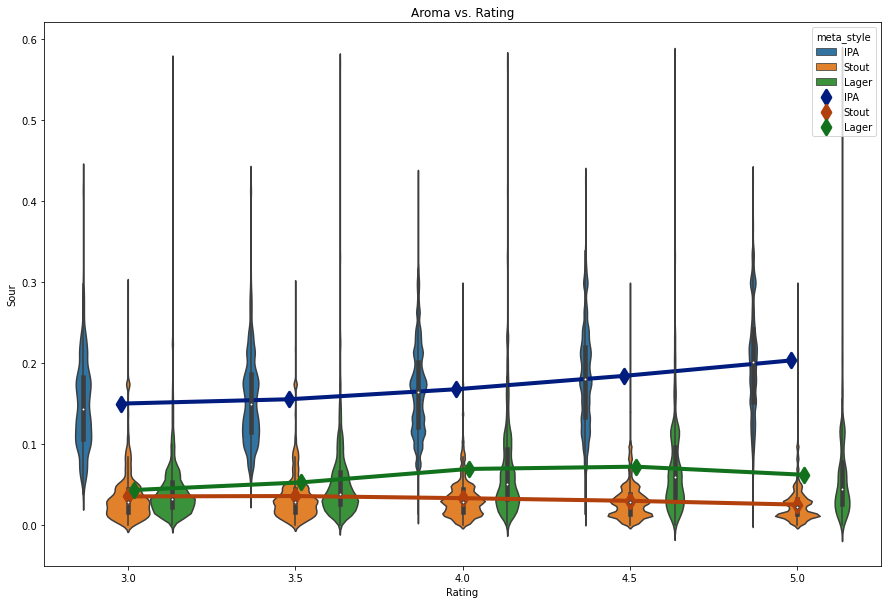

In [13]:
styles_to_analyze = ['Lager', 'Stout', 'IPA']
# Astringency, Body, Alcohol, Bitter, Sweet, Sour, Salty; Fruits, Hoppy, Spices, Malty 
aroma_to_analyze = 'Sour'

#######################
# Aroma vs. Overall Step, print only where reviews are >= 3
reduced_df = merged_reviews[merged_reviews['overall'] >= 3]
reduced_df = reduced_df[reduced_df['meta_style'].isin(styles_to_analyze)]

fig, axs = plt.subplots(figsize=(15, 10))
sns.violinplot(x='overall_step', y=aroma_to_analyze, hue= 'meta_style', data=reduced_df, ax = axs)
sns.pointplot(x='overall_step', y=aroma_to_analyze, hue= 'meta_style', data=reduced_df, dodge=True, join=True, palette='dark', markers='d', scale=1.5, ci=None, ax = axs)
plt.title('Aroma vs. Rating')
plt.xlabel('Rating')
plt.show()


In [14]:
from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.plotting import *

In [15]:
merged_aromas.columns

Index(['beer_id', 'name_beer', 'brewery_id', 'style', 'availability', 'abv',
       'notes_beer', 'retired', 'name_brewery', 'city', 'state', 'country',
       'notes_brewery', 'types', 'key', 'Style', 'Style Key', 'Description',
       'ABV', 'Ave Rating', 'Min IBU', 'Max IBU', 'Astringency', 'Body',
       'Alcohol', 'Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy',
       'Spices', 'Malty', 'meta_style'],
      dtype='object')

In [16]:
avg_aromas_per_style = merged_aromas_norm.groupby('meta_style').mean()
avg_aromas_per_style = avg_aromas_per_style[['Astringency', 'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty']]
avg_aromas_per_style

,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
meta_style,,,,,,,,,,,
Alcohol-free,0.143870,0.105255,0.129412,0.155490,0.104620,0.038973,0.019162,0.061871,0.202120,0.025096,0.134385
Ale,0.210670,0.215477,0.128641,0.253111,0.272788,0.135992,0.013186,0.207683,0.275258,0.072842,0.231744
Ambree,0.224573,0.226183,0.126655,0.325271,0.262239,0.095003,0.010923,0.160172,0.372904,0.134985,0.365208
Belgian Blonde,0.161287,0.237046,0.256749,0.141635,0.434005,0.128191,0.005074,0.306136,0.136655,0.161454,0.221776
Boozy,0.114701,0.207780,0.254157,0.181286,0.353175,0.073248,0.010056,0.167555,0.172203,0.088321,0.263379
IPA,0.238956,0.187909,0.108663,0.415706,0.231170,0.179078,0.014947,0.368274,0.500000,0.053026,0.136306
Lager,0.180199,0.153437,0.103967,0.177665,0.178700,0.053843,0.019305,0.096477,0.199683,0.079028,0.195164
Other,0.214569,0.172604,0.084252,0.181252,0.201331,0.120120,0.021793,0.191060,0.212024,0.113267,0.190739
Sour,0.255820,0.113654,0.053292,0.050395,0.191820,0.266765,0.084617,0.252500,0.079498,0.038965,0.079812


In [17]:
threshold = 0.3
prevalent_aromas_per_style = avg_aromas_per_style.copy()
prevalent_aromas_per_style[prevalent_aromas_per_style < threshold] = 0
prevalent_aromas_per_style[prevalent_aromas_per_style >= threshold] = 1

names_that_appear = []
for style in avg_aromas_per_style.index:
    names_that_appear.append(prevalent_aromas_per_style.columns[prevalent_aromas_per_style.loc[style] == 1].tolist())
    print(style, prevalent_aromas_per_style.columns[prevalent_aromas_per_style.loc[style] == 1].tolist())

names_that_appear = [item for sublist in names_that_appear for item in sublist]
names_that_appear = list(set(names_that_appear))
names_that_appear

Alcohol-free []
Ale []
Ambree ['Bitter', 'Hoppy', 'Malty']
Belgian Blonde ['Sweet', 'Fruits']
Boozy ['Sweet']
IPA ['Bitter', 'Fruits', 'Hoppy']
Lager []
Other []
Sour []
Stout ['Body', 'Bitter', 'Malty']
Wheat Beer ['Fruits']
Winter Beer ['Sweet', 'Spices', 'Malty']


['Sweet', 'Spices', 'Fruits', 'Body', 'Malty', 'Bitter', 'Hoppy']

In [18]:
most_prevalent_aroma = []
for style in prevalent_aromas_per_style.index:
    most_prevalent_aroma.append(avg_aromas_per_style.columns[avg_aromas_per_style.loc[style] == avg_aromas_per_style.loc[style].max()].tolist())
    print(style, avg_aromas_per_style.columns[avg_aromas_per_style.loc[style] == avg_aromas_per_style.loc[style].max()].tolist())

Alcohol-free ['Hoppy']
Ale ['Hoppy']
Ambree ['Hoppy']
Belgian Blonde ['Sweet']
Boozy ['Sweet']
IPA ['Hoppy']
Lager ['Hoppy']
Other ['Astringency']
Sour ['Sour']
Stout ['Body']
Wheat Beer ['Fruits']
Winter Beer ['Spices']


In [19]:
dict_colour_aromas = {'Astringency': 'black', 'Body': 'blue', 'Alcohol': 'green', 'Bitter': 'orange', 'Sweet': 'purple', 'Sour': 'yellow', 'Salty': 'white', 'Fruits': 'red', 'Hoppy': 'olive', 'Spices': 'orange', 'Malty': 'pink'}
colour_per_beer_type = []

# add the most prevalent aroma colour
for style in prevalent_aromas_per_style.index:
    colour_per_beer_type.append(dict_colour_aromas[most_prevalent_aroma[avg_aromas_per_style.index.tolist().index(style)][0]])

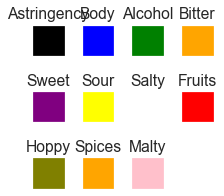

In [20]:
# Display all the aroma names, with their colour as background
fig, axs = plt.subplots(3,4,figsize=(3, 3))
axs = axs.ravel()
i = 0
for aroma, colour in dict_colour_aromas.items():
    axs[i].set_facecolor(colour)
    axs[i].set_title(aroma)
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    # remove grid lines
    axs[i].grid(False)
    
    i += 1
axs[i].set_facecolor('white')
axs[i].set_title(' ')
axs[i].set_xticks([])
axs[i].set_yticks([])
axs[i].grid(False)
plt.tight_layout()

In [21]:
style_similarity = pd.DataFrame(index=avg_aromas_per_style.index, columns=avg_aromas_per_style.index)

# import cohenD from psmpy.functions
from psmpy.functions import cohenD

def distance(val1, val2, metric = 'euclidean'):
    if metric == 'euclidean':
        return np.sqrt(np.sum(np.square(val1 - val2)))
    elif metric == 'manhattan':
        return np.sum(np.abs(val1 - val2))
    elif metric == 'cosine':
        return 1 - np.dot(val1, val2) / (np.sqrt(np.dot(val1, val1)) * np.sqrt(np.dot(val2, val2)))
    elif metric == 'jaccard':
        return 1 - np.sum(np.minimum(val1, val2)) / np.sum(np.maximum(val1, val2))
    

def compute_similarity(style1, style2):
    style1_values = avg_aromas_per_style.loc[style1]
    style2_values = avg_aromas_per_style.loc[style2]

    score_list = []
    
    for aroma in avg_aromas_per_style.columns:
        score_list.append(distance(style1_values[aroma], style2_values[aroma], metric='euclidean'))
    
    return score_list

for style1 in avg_aromas_per_style.index:
    for style2 in avg_aromas_per_style.index:
        style_similarity.loc[style1, style2] = compute_similarity(style1, style2)


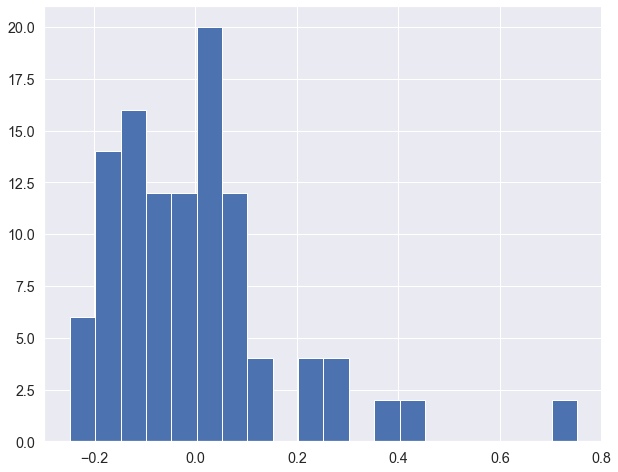

In [235]:

style_similarity_mean_per_cell = style_similarity.copy()
style_similarity_mean_per_cell = style_similarity_mean_per_cell.applymap(np.mean)
# invert the values (the lower the value, the more similar the styles), avoid division by 0
style_similarity_mean_per_cell = style_similarity_mean_per_cell.applymap(lambda x: 1/x if x != 0 else None)

# Drop the Other column and Row
style_similarity_mean_per_cell = style_similarity_mean_per_cell.drop('Other', axis=0)
style_similarity_mean_per_cell = style_similarity_mean_per_cell.drop('Other', axis=1)

# normalize with mean and std style_similarity_mean_per_cell between 0 and 1
style_similarity_mean_per_cell = style_similarity_mean_per_cell.applymap(lambda x: (x - style_similarity_mean_per_cell.mean().mean()) / style_similarity_mean_per_cell.std().std())

# normalize style_similarity_mean_per_cell
style_similarity_mean_per_cell = style_similarity_mean_per_cell.applymap(lambda x: (x - style_similarity_mean_per_cell.min().min()) / (style_similarity_mean_per_cell.max().max() - style_similarity_mean_per_cell.min().min()))

# make style_similarity_mean_per_cell between -1 and 1
style_similarity_mean_per_cell = style_similarity_mean_per_cell.applymap(lambda x: (x)-style_similarity_mean_per_cell.mean().mean())

# plot value distribution
plt.hist(style_similarity_mean_per_cell.values.flatten(), bins=20)
plt.show()

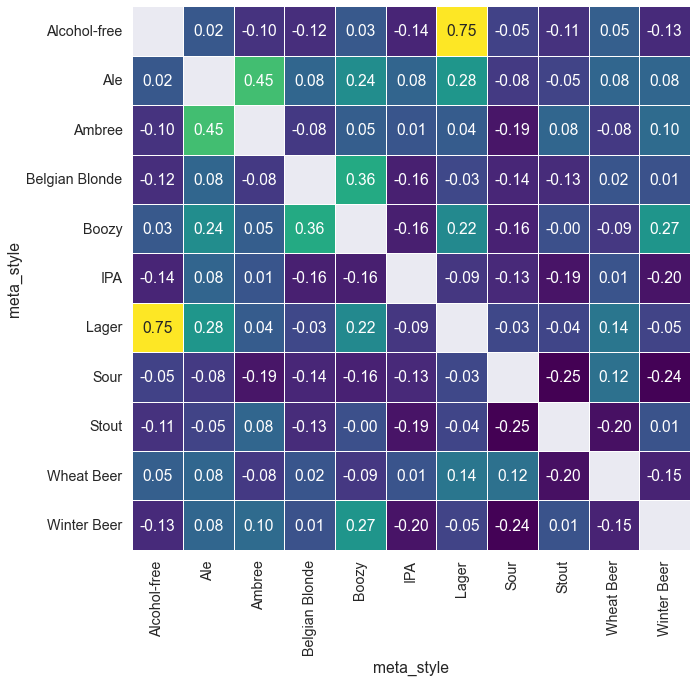

In [236]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(style_similarity_mean_per_cell, ax=ax, cmap='viridis', annot=True, fmt='.2f', linewidths=.5, cbar=False)
plt.show()

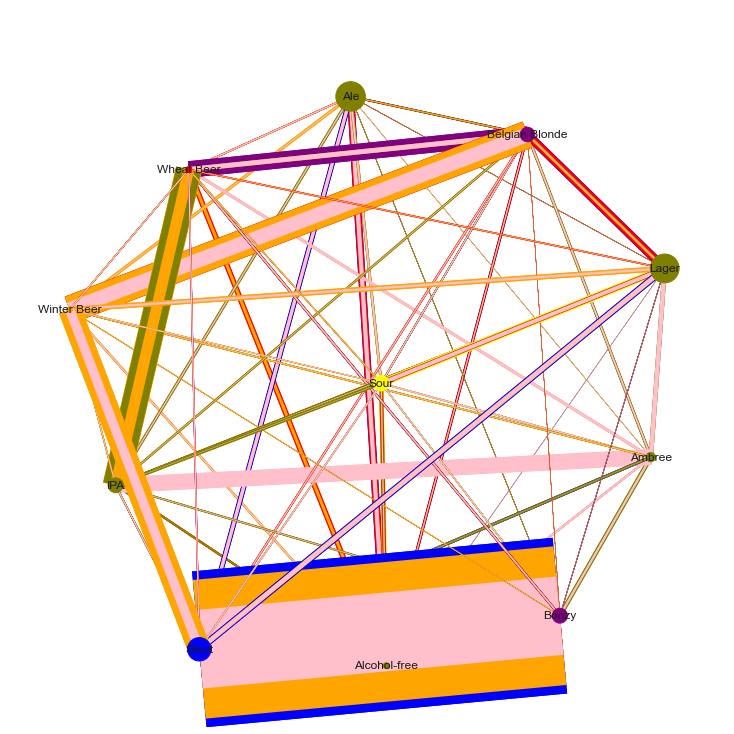

In [237]:
import networkx as nx

# create a network graph
G = nx.MultiGraph()

# add nodes, the size is the number of beers per style, the colour is the colour_per_beer_type
for style in avg_aromas_per_style.index:
    if style == 'Other':
        continue
    size = len(merged_aromas_norm[merged_aromas_norm['meta_style'] == style])
    colour = colour_per_beer_type[avg_aromas_per_style.index.tolist().index(style)]
    G.add_node(style, size=size, colour=colour)

# add edges, the width is the similarity between the styles, the colour is the aroma type

for style1 in style_similarity_mean_per_cell.index:
    for style2 in style_similarity_mean_per_cell.index:
        i = 0
        for aroma, col in dict_colour_aromas.items():
            width = style_similarity.loc[style1, style2][i]
            # normalise the width
            width = width / style_similarity_mean_per_cell.loc[style1, style2].max()

            if width != 0:
                G.add_edge(style1, style2, width=width, colour=col)

            i += 1
    
# draw the graph
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G, k=0.5, iterations=50)
node_size = [G.nodes[node]['size'] for node in G]
node_colour = [G.nodes[node]['colour'] for node in G]

edge_width = [G.edges[edge]['width'] for edge in G.edges]
edge_colour = [G.edges[edge]['colour'] for edge in G.edges]

nx.draw(G, pos, node_size=node_size, node_color=node_colour, edge_color=edge_colour, width=edge_width, with_labels=True)
plt.show()

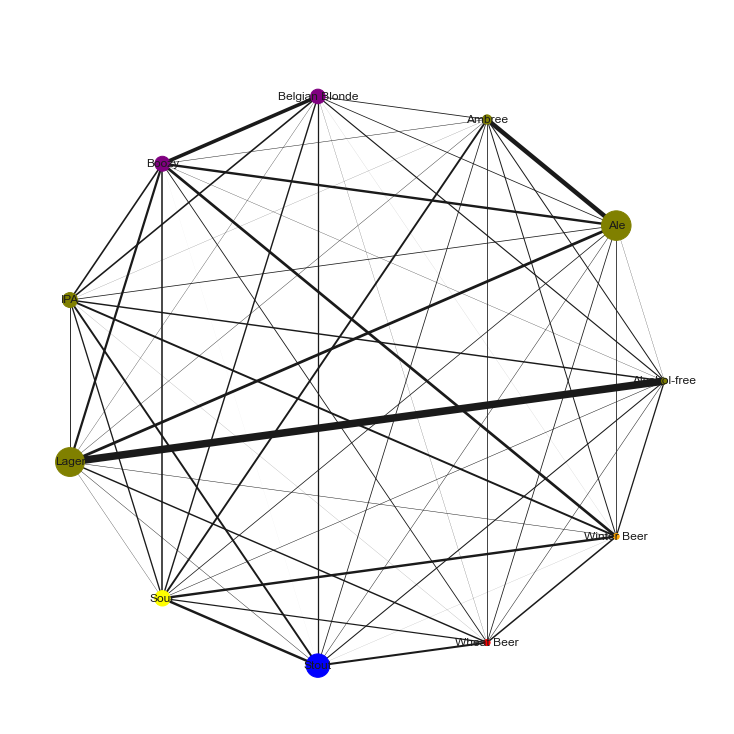

In [238]:
import networkx as nx

# create a network graph
G = nx.Graph()

# add nodes, the size is the number of beers per style, the colour is the colour_per_beer_type
for style in avg_aromas_per_style.index:
    if style == 'Other':
        continue
    size = len(merged_aromas_norm[merged_aromas_norm['meta_style'] == style])
    colour = colour_per_beer_type[avg_aromas_per_style.index.tolist().index(style)]
    G.add_node(style, size=size, colour=colour)

# add edges, the width is the similarity between the styles

for style1 in style_similarity_mean_per_cell.index:
    for style2 in style_similarity_mean_per_cell.index:
        width = style_similarity_mean_per_cell.loc[style1, style2]

        if width != 0:
            G.add_edge(style1, style2, width=width*10)

# draw the graph
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G, k=0.5, iterations=50)
node_size = [G.nodes[node]['size'] for node in G]
node_colour = [G.nodes[node]['colour'] for node in G]

edge_width = [G.edges[edge]['width'] for edge in G.edges]

# draw in circular_layout
nx.draw_circular(G, node_size=node_size, node_color=node_colour, width=edge_width, with_labels=True)
plt.show()



In [239]:
bubble_data = pd.DataFrame(index=avg_aromas_per_style.index, columns=['size', 'colour'])
bubble_data['size'] = [len(merged_aromas_norm[merged_aromas_norm['meta_style'] == style]) for style in avg_aromas_per_style.index]
bubble_data['colour'] = [colour_per_beer_type[avg_aromas_per_style.index.tolist().index(style)] for style in avg_aromas_per_style.index]
bubble_data = bubble_data.drop('Other', axis=0)
bubble_data

,size,colour
meta_style,,
Alcohol-free,34,olive
Ale,871,olive
Ambree,86,olive
Belgian Blonde,212,purple
Boozy,223,purple
IPA,222,olive
Lager,828,olive
Sour,236,yellow
Stout,548,blue


In [240]:
style_similarity_mean_per_cell

meta_style,Alcohol-free,Ale,Ambree,Belgian Blonde,Boozy,IPA,Lager,Sour,Stout,Wheat Beer,Winter Beer
meta_style,,,,,,,,,,,
Alcohol-free,NaN,0.023118,-0.100749,-0.116170,0.027964,-0.144975,0.752442,-0.049689,-0.105906,0.049570,-0.129012
Ale,0.023118,NaN,0.451109,0.076784,0.239811,0.075310,0.279295,-0.076753,-0.046353,0.078994,0.079581
Ambree,-0.100749,0.451109,NaN,-0.082469,0.046809,0.014554,0.038707,-0.190307,0.077333,-0.080187,0.097317
Belgian Blonde,-0.116170,0.076784,-0.082469,NaN,0.358360,-0.161074,-0.029773,-0.141082,-0.126398,0.017639,0.005803
Boozy,0.027964,0.239811,0.046809,0.358360,NaN,-0.164566,0.222893,-0.155372,-0.001552,-0.086288,0.272305
IPA,-0.144975,0.075310,0.014554,-0.161074,-0.164566,NaN,-0.090717,-0.132551,-0.193493,0.011066,-0.195351
Lager,0.752442,0.279295,0.038707,-0.029773,0.222893,-0.090717,NaN,-0.029497,-0.043590,0.144086,-0.047319
Sour,-0.049689,-0.076753,-0.190307,-0.141082,-0.155372,-0.132551,-0.029497,NaN,-0.247558,0.120931,-0.242826
Stout,-0.105906,-0.046353,0.077333,-0.126398,-0.001552,-0.193493,-0.043590,-0.247558,NaN,-0.204889,0.008423


In [276]:
import numpy as np
import matplotlib.pyplot as plt

id_to_style = {i: style for i, style in enumerate(style_similarity_mean_per_cell.index)}
initial_index = np.array([[None,None,3,None,8],
                 [None,None,4,10,2],
                 [7,9,6,1,5],
                 [None,None,None,0,None]])

class Bubble:
    def __init__(self, id, x, y, area, forces):
        
        self.id = id
        self.area = area
        self.force = forces
        self.x = x
        self.y = y
        self.radius = np.sqrt(area / np.pi)
    
    def force_to(self, other):
        # force between two bubbles
        return self.force[other.id]
    
    def distance_to(self, other):
        # Euclidean distance, take into consideration the radius of the bubbles
        return np.sqrt((self.x - other.x)**2 + (self.y - other.y)**2) - (self.radius + other.radius)
    
    def gravity_to(self, other):
        # gravity force
        #print("bubble {} to bubble {}, with force {}, distance {}, gravity {}".format(id_to_style[self.id], id_to_style[other.id], self.force_to(other), self.distance_to(other), self.force_to(other) / self.distance_to(other)**2))
        return self.force_to(other) / (3*self.distance_to(other)**3)

    def xy(self):
        return np.array([self.x, self.y])

class GravityBubbleChart:
    def __init__(self, area, bubble_spacing=0, force = None, seed = 0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.

        Notes
        -----
        If "area" is sorted, the results might look weird.
        """
        area = np.asarray(area)

        self.bubble_spacing = bubble_spacing

        self.nb_bubbles = len(area)

        self.bubbles = []
        # create an array of class Bubble
        for i in range(self.nb_bubbles):
            b = Bubble(i, 0, 0, area[i], force[i])
            self.bubbles.append(b)
        
        self.bubbles = np.array(self.bubbles)

        self.maxstep = 2 * np.array([b.radius for b in self.bubbles[:]]).max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate a 4*5 grid of positions
        gx, gy = np.meshgrid(np.linspace(0, 5, 5), np.linspace(0, 4, 4))

        # randomize bubble positions, no repetitions
        #np.random.seed(seed)
        #random_id_list =  np.random.choice(self.nb_bubbles, self.nb_bubbles, replace=False)
        
        for b in self.bubbles[:]:
            x_index = np.where(initial_index == b.id)[0][0]
            y_index = np.where(initial_index == b.id)[1][0]
            b.x = gx[x_index, y_index]*200
            b.y = gy[x_index, y_index]*200

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            np.array([b.xy() for b in self.bubbles[:]]), axis=0, weights=np.array([b.area for b in self.bubbles[:]])
        )

    def center_distance(self, bubble, bubbles):

        if type(bubble) == np.ndarray:
            if type(bubbles[0]) == np.ndarray:
                return np.hypot(bubble[0] - np.array([b[0] for b in bubbles[:]]),
                        bubble[1] - np.array([b[1] for b in bubbles[:]]))
            else :
                return np.hypot(bubble[0] - np.array([b.x for b in bubbles[:]]),
                        bubble[1] - np.array([b.y for b in bubbles[:]]))
        else:
            if type(bubbles[0]) == np.ndarray:
                return np.hypot(bubble.x - np.array([b[0] for b in bubbles[:]]),
                        bubble.y - np.array([b[1] for b in bubbles[:]]))
            return np.hypot(bubble.x - np.array([b.x for b in bubbles[:]]),
                        bubble.y - np.array([b.y for b in bubbles[:]]))

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble.radius - \
            np.array([b.radius for b in bubbles[:]]) - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        idx_min = np.argmin(distance)
        return idx_min if type(idx_min) == np.ndarray else [idx_min]

    def calculate_distance_error(self):
        # For each bubble add error to close bubbles with negative force, and remove error to close bubbles with positive force
        error = 0
        for i in range(self.nb_bubbles):
            for j in range(self.nb_bubbles):
                if i != j:
                    error += self.bubbles[i].gravity_to(self.bubbles[j]) / self.outline_distance(self.bubbles[i], [self.bubbles[j]])
        return error

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """

        for _i in range(n_iterations):

            moves = 0

            for i in range(self.nb_bubbles):

                # remove bubble from list of bubbles
                rest_bub = np.delete(self.bubbles, i, 0)

                # try to move directly towards the center of mass with force attraction to other bubbles
                # direction vector from bubble to the center of mass with force attraction to other bubbles

                dir_vec = - self.bubbles[i].xy()
                #dir_vec = self.com - self.bubbles[i].xy()
                
                for j in range(self.nb_bubbles):
                    if j != i:
                        attraction_force = self.bubbles[i].gravity_to(self.bubbles[j])
                        # print("bubble ", id_to_style[self.bubbles[i].id], " is attracted to ", id_to_style[self.bubbles[j].id], " : ", attraction_force > 0)
                        
                        dir_vec += np.array([attraction_force*(self.bubbles[j].x - self.bubbles[i].x), attraction_force*(self.bubbles[j].y - self.bubbles[i].y)])
                        
                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i].xy() + dir_vec * self.step_dist
                
                new_bubble = Bubble(self.bubbles[i].id, new_point[0], new_point[1], self.bubbles[i].area, self.bubbles[i].force)

                # check whether new bubble collides with other bubbles
                # print type of rest_bub
                
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding].xy() - self.bubbles[i].xy()
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i].xy() + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i].xy() - orth *
                                      self.step_dist)

                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2

                        new_bubble = Bubble(self.bubbles[i].id, new_point[0], new_point[1], self.bubbles[i].area, self.bubbles[i].force)

                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i] = new_bubble
                            self.com = self.center_of_mass()

            if moves / self.nb_bubbles < 0.1:
                self.step_dist = self.step_dist / 2
        
    def plot(self, ax, labels, colors):
        """
        Draw the bubble plot.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        """
        for i in range(self.nb_bubbles):

            circ = plt.Circle(
                self.bubbles[i].xy(), self.bubbles[i].radius, color=colors[i])
            
            ax.add_patch(circ)
            ax.text(*self.bubbles[i].xy(), labels[i],
                    horizontalalignment='center', verticalalignment='center')

In [277]:
# make a Packed bubble chart, where the size of the bubble is the number of beers per style, and the colour is the colour_per_beer_type. The bubbles are packed together,bubbles with high scores are closer together, and bubbles with low scores are further apart.

bubble_chart = GravityBubbleChart(area=bubble_data['size'], bubble_spacing=0.1, force = style_similarity_mean_per_cell.to_numpy())

In [282]:
bubble_chart = GravityBubbleChart(area=bubble_data['size'], bubble_spacing=0.1, force = style_similarity_mean_per_cell.to_numpy(), seed = seed_list[error_list.index(min(error_list))] )
bubble_chart.collapse(n_iterations=100)

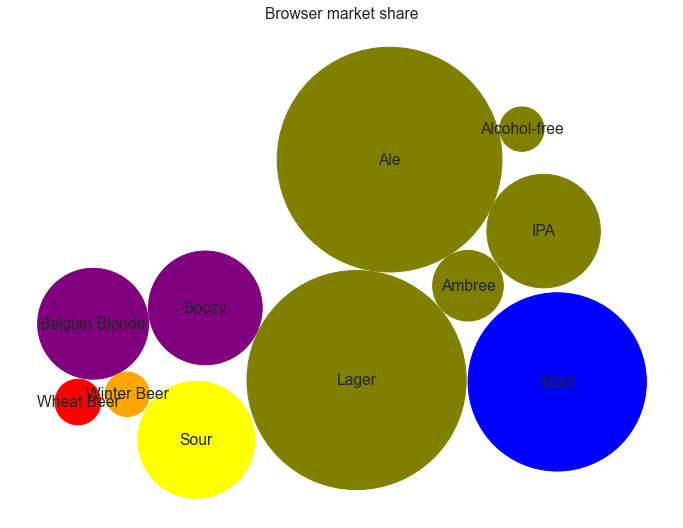

In [283]:
fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"), figsize=(12, 12))
bubble_chart.plot(
    ax, style_similarity_mean_per_cell.index, bubble_data['colour'])
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('Browser market share')

plt.show()

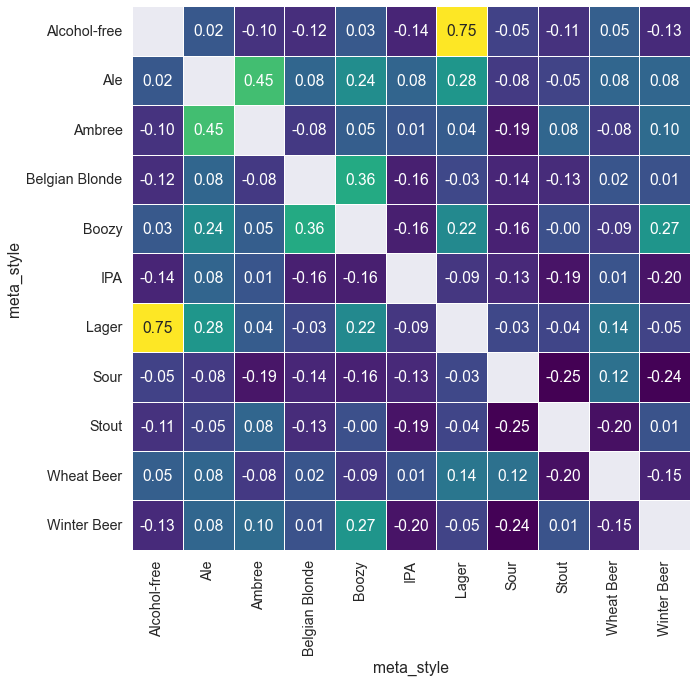

In [261]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(style_similarity_mean_per_cell, ax=ax, cmap='viridis', annot=True, fmt='.2f', linewidths=.5, cbar=False)
plt.show()

In [246]:
# group reviews by beer style and overall_step
grouped_reviews = merged_reviews.groupby(['meta_style', 'overall_step']).agg({'overall': 'count'}).reset_index()
grouped_reviews

,meta_style,overall_step,overall
0,Alcohol-free,1.0,171
1,Alcohol-free,1.5,142
2,Alcohol-free,2.0,356
3,Alcohol-free,2.5,217
4,Alcohol-free,3.0,341
...,...,...,...
103,Winter Beer,3.0,1783
104,Winter Beer,3.5,2814
105,Winter Beer,4.0,6065
106,Winter Beer,4.5,1709
